In [1]:
import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint

from rdkit.Chem.rdMolDescriptors import *

from rdkit.Chem.AtomPairs.Sheridan import GetBPFingerprint
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs

from rdkit import DataStructs
from rdkit.Chem import Draw


In [2]:
def generate_fingerprint(mol, fp_case, fp_len):
    #print ("Using the fingerprint:")
    if (fp_case==0):
        #print ("Estate (1995)")
        return FingerprintMol(mol)[0]
    elif (fp_case==1):
        #print ("Morgan circular")
        return GetMorganFingerprintAsBitVect(mol, 2, fp_len)
    elif (fp_case==2):
        #print ("Atom pair (1985)")
        return GetHashedAtomPairFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==3):
        #print ("Topological torsion (1987)")
        return GetHashedTopologicalTorsionFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==4):
        #print ("Avalon bit based (2006)")
        return GetAvalonFP(mol, fp_len)
    elif (fp_case==5):
        #print ("Avalon+mol. weight")
        return np.append(GetAvalonFP(mol, fp_len), Descriptors.MolWt(mol))
    elif (fp_case==6):
        #print ("RDKit fingerprint")
        return RDKFingerprint(mol, fpSize=fp_len)
    elif (fp_case==7):
        #print ("ErG fingerprint (2006)")
        return GetErGFingerprint(mol)

read SMILES from file: A.txt


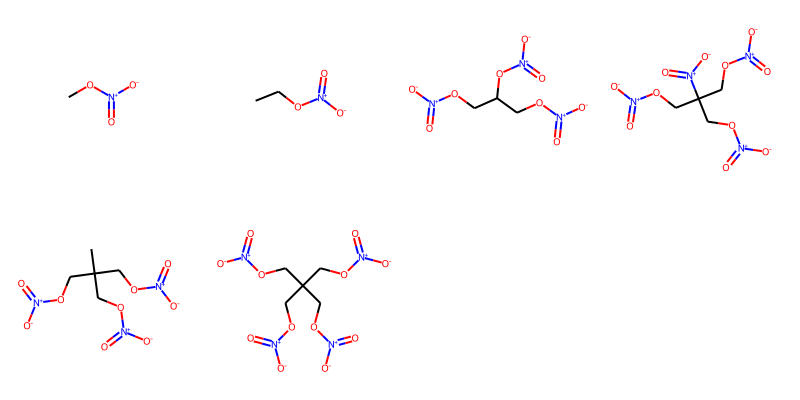

In [3]:
filename = "A.txt"
print("read SMILES from file:", filename)
smiles = np.loadtxt(filename, dtype=str)

Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in smiles], molsPerRow=4, subImgSize=(200,200))



In [4]:
fp_case = 0
fp_len = 128

fps = []
for tsmiles in smiles:
    print (tsmiles)
    tmol = Chem.MolFromSmiles(tsmiles)
    fp = generate_fingerprint(tmol, fp_case, fp_len)
    fps.append(fp)
nconfig = len(fps)

CO[N+](=O)[O-]
CCO[N+](=O)[O-]
C(C(CO[N+](=O)[O-])O[N+](=O)[O-])O[N+](=O)[O-]
C(C(CO[N+](=O)[O-])(CO[N+](=O)[O-])[N+](=O)[O-])O[N+](=O)[O-]
CC(CO[N+]([O-])=O)(CO[N+]([O-])=O)CO[N+]([O-])=O
C(C(CO[N+](=O)[O-])(CO[N+](=O)[O-])CO[N+](=O)[O-])O[N+](=O)[O-]


In [5]:
dist_sim = np.zeros((nconfig,nconfig))
for iconfig1 in range(nconfig):
    for iconfig2 in range(nconfig):
        dist_sim[iconfig1,iconfig2] = DataStructs.FingerprintSimilarity(fps[iconfig1],fps[iconfig2])

AttributeError: 'numpy.ndarray' object has no attribute 'GetNumBits'

In [ ]:
print(dist_sim)